<a href="https://colab.research.google.com/github/dipayandas97/Blob-detection-/blob/master/Kalman_Filter_on_Mouse_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [0]:
def prediction(X_hat_t_1,P_t_1,F_t,B_t,U_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)+(B_t.dot(U_t).reshape(B_t.shape[0],-1) )
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    

In [0]:
def update(X_hat_t,P_t,Z_t,R_t,H_t):
    
    K_prime=P_t.dot(H_t.transpose()).dot( np.linalg.inv ( H_t.dot(P_t).dot(H_t.transpose()) +R_t ) )  
    #print("K:\n",K_prime)
    
    X_t=X_hat_t+K_prime.dot(Z_t-H_t.dot(X_hat_t))
    P_t=P_t-K_prime.dot(H_t).dot(P_t)
    
    return X_t,P_t

In [51]:
acceleration=0
delta_t=1/20#milisecond

F_t=np.array([ [1 ,0,delta_t,0] , [0,1,0,delta_t] , [0,0,1,0] , [0,0,0,1] ])
 
#Initial State cov
P_t= np.identity(4)*0.2
 
#Process cov
Q_t= np.identity(4)
 
#Control matrix
B_t=np.array( [ [0] , [0], [0] , [0] ])
 
#Control vector
U_t=acceleration
 
#Measurment Matrix
H_t = np.array([ [1, 0, 0, 0], [ 0, 1, 0, 0]])
 
#Measurment cov
R_t= np.identity(2)*5
 
# Initial State
X_hat_t = np.array( [[0],[0],[0],[0]] )


print("X_hat_t",X_hat_t.shape)
print("P_t",P_t.shape)
print("F_t",F_t.shape)
print("B_t",B_t.shape)
print("Q_t",Q_t.shape)
print("R_t",R_t.shape)
print("H_t",H_t.shape)

X_hat_t (4, 1)
P_t (4, 4)
F_t (4, 4)
B_t (4, 1)
Q_t (4, 4)
R_t (2, 2)
H_t (2, 4)


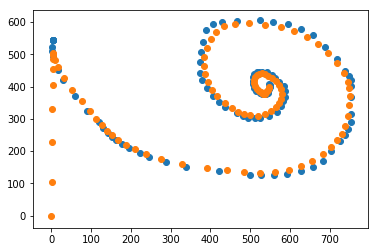

In [52]:
pred = []
measurements = np.array([[47, 586], [47, 586], [47, 586], [47, 586], [47, 586], [47, 586], [45, 564], [45, 554], [46, 537], [59, 494], [73, 463], [103, 413], [132, 368], [162, 332], [173, 315], [185, 299], [194, 287], [204, 277], [219, 265], [238, 253], [265, 236], [289, 224], [331, 207], [380, 192], [465, 179], [543, 169], [570, 169], [601, 169], [636, 171], [669, 182], [700, 194], [725, 213], [746, 242], [769, 273], [781, 291], [789, 310], [795, 332], [795, 356], [796, 409], [796, 443], [796, 463], [791, 475], [780, 491], [761, 528], [731, 565], [699, 601], [671, 621], [637, 636], [599, 643], [566, 648], [509, 647], [471, 644], [449, 637], [432, 618], [424, 581], [419, 551], [417, 520], [417, 485], [422, 463], [435, 439], [449, 414], [464, 396], [480, 380], [508, 359], [525, 350], [537, 346], [554, 345], [568, 345], [590, 350], [609, 365], [620, 382], [625, 397], [629, 411], [629, 428], [628, 443], [615, 458], [605, 469], [596, 478], [584, 486], [572, 488], [565, 488], [559, 488], [552, 481], [549, 472], [549, 460], [549, 450], [553, 437], [556, 430], [566, 423], [573, 420], [576, 418], [578, 418], [581, 418], [586, 421], [588, 430], [590, 434], [591, 440], [591, 445], [591, 447], [590, 449]],dtype='float64').reshape(-1,2)
measurements += 100*np.random.randn()

for i in range(measurements.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    pred.append(X_hat_t)

    Z_t=measurements[i].transpose()
    Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t

pred = np.array(pred)

plt.scatter(measurements[:,0],measurements[:,1])
plt.scatter(pred[:,0],pred[:,1])
plt.show()



In [0]:
|